In [1]:
import pandas as pd
import sys
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from scipy.stats import variation, pearsonr
import numpy as np


data_unpacked = pd.read_csv("sqisland.csv")

Genes = ["Gene1", "Gene2", "Gene3", "Gene4", "Gene5", "Gene6", "Gene7"]
x = data_unpacked["X"]
y = data_unpacked["Y"]
data = data_unpacked[Genes]

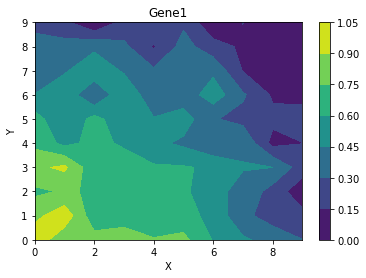

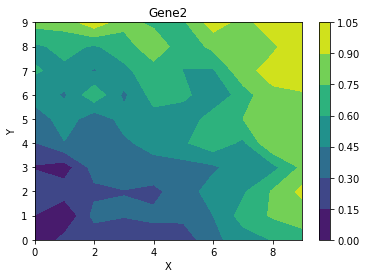

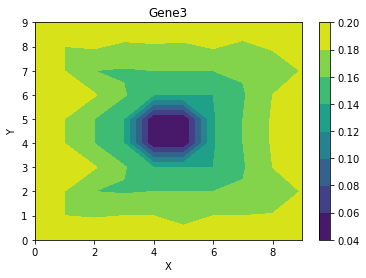

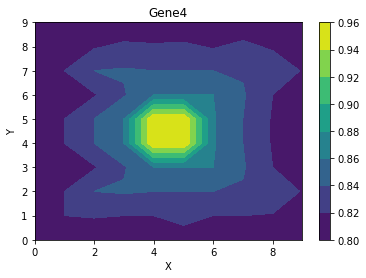

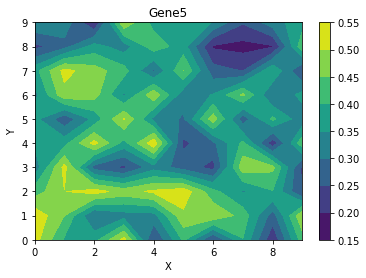

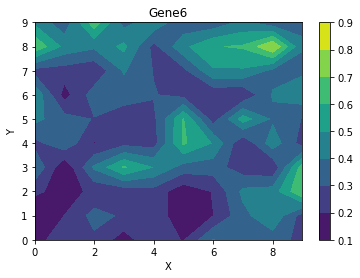

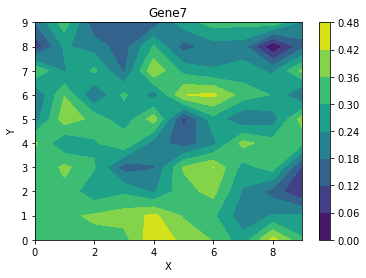

In [2]:
plot_a = plt.figure(1)
plt.contourf(x.values.reshape(10,10), y.values.reshape(10,10), data_unpacked["Gene1"].values.reshape(10,10))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gene1")
plt.colorbar()
plot_b = plt.figure(2)
plt.contourf(x.values.reshape(10,10), y.values.reshape(10,10), data_unpacked["Gene2"].values.reshape(10,10))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gene2")
plt.colorbar()
plot_c = plt.figure(3)
plt.contourf(x.values.reshape(10,10), y.values.reshape(10,10), data_unpacked["Gene3"].values.reshape(10,10))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gene3")
plt.colorbar()
plot_d = plt.figure(4)
plt.contourf(x.values.reshape(10,10), y.values.reshape(10,10), data_unpacked["Gene4"].values.reshape(10,10))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gene4")
plt.colorbar()
plot_e = plt.figure(5)
plt.contourf(x.values.reshape(10,10), y.values.reshape(10,10), data_unpacked["Gene5"].values.reshape(10,10))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gene5")
plt.colorbar()
plot_f = plt.figure(6)
plt.contourf(x.values.reshape(10,10), y.values.reshape(10,10), data_unpacked["Gene6"].values.reshape(10,10))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gene6")
plt.colorbar()
plot_g = plt.figure(7)
plt.contourf(x.values.reshape(10,10), y.values.reshape(10,10), data_unpacked["Gene7"].values.reshape(10,10))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gene7")
plt.colorbar()
plt.show()

The Hunter Gatherers are uniformly distributed throughout the land. Throughout the land, the commonality of Gene 1 and Gene 2 are roughly similar. For locus 1, there is approximate
ratio of 1:1 as Gene 1 and Gene 2 at Locus 1 are normally distributed across the island. Locus 2 is either Gene 3 or Gene 4. Gene 4 is predominantly located in the middle of island and Gene 3 are predominantly located in the coastal regions of the island - as the hunter-gatherers’ genetic makeup are uniformly distributed across the island, they will have a ratio of 1:1 or close to 1:1 between Gene 3 and 4 at Locus 2.

Farmers' Population will have a genetic makeup where there is a slight skew of Gene 1 allele for their locus 1 as there is a high density of Gene 1 allele in the South West region of the island which is the first point of entry for the farmers. The density of Gene 1 slowly reduces the further east and north you go in the map from the south west region matching the migration patterns of the farmers moving one mile with each generation. The reason why I said it is a slight skew is because Gene 1 and Gene 2 are normally distributed across the island with each generation migrating, the presence of Gene 2 in the genetic makeup will increase.
The farmer's population is mainly Gene 3 allele as the south west region is densely populated with the Gene 3 allele and that's their initial point of entry to the island. Gene 3 dominates the coastal regions so there will be a skew in their genetic makeup as they arrive and settle through the coast initially.

There is no correlation between Locus 1 and Locus 2 as there is little to no correlation between Gene 1 and Gene 3, Gene 1 and Gene 4, Gene 2 and Gene 3, Gene 2 and Gene 4


The seafarers have a very high probability of having Gene 3 as their locus 2 allele as the distribution of Gene 3 is in the coastal regions of the islands and the seafarers’ first point of entry is along the coasts. Gene 7 is more common in the seafarers compared to Gene 5 and 6 at Locus 3 as there is a general highly propensity of Gene 7 at Locus 3 also there is a higher chance of possessing Gene 7 as the heat map shows a green hue in the coastal regions which is about 0.3 to 0.6 which is significantly higher than Gene 5 highest probability of 0.2 and the blue hue of Gene 6 (about 0 to 0.3 probability).

There is roughly a 1:1 ratio between Gene 1 and Gene 2 alleles at Locus 1 as the distribution of the genes is normal distribution so there is a fair balance between the two. There will be little to no skew with the Gene 1 and Gene 2 presence at Locus 1 among the seafarers. Gene 2 is prominent on the north and especially the north east and east coast meanwhile Gene 1 is prominent in the south west region of the island.


In [3]:
print("The variances of Genes 1 to 7: ")
print("{}".format(data.var(ddof=0)))
print("Total Variance: {}".format(sum(data.var(ddof=0))))

The variances of Genes 1 to 7: 
Gene1    0.060582
Gene2    0.060582
Gene3    0.001084
Gene4    0.001084
Gene5    0.009514
Gene6    0.020771
Gene7    0.009075
dtype: float64
Total Variance: 0.1626925628698946


In [4]:
corr_a = pearsonr(data_unpacked["Gene1"], data_unpacked["Gene4"]) 
print('Pearsons correlation of Gene 1 and 4: {} \n'.format(corr_a))

corr_b = pearsonr(data_unpacked["Gene1"], data_unpacked["Gene5"]) 
print('Pearsons correlation of Gene 1 and 5: {} \n'.format(corr_b))

Pearsons correlation of Gene 1 and 4: (0.07526456660171593, 0.4567315550997579) 

Pearsons correlation of Gene 1 and 5: (0.3601203240798584, 0.00023304482007153996) 



The p-value (2nd value or value on the right) represents a test of the null hypothesis that x and y are uncorrelated. 
Pearson correlation coefficients (1st Value or the value on the left) when close to zero (i.e. weak correlation) will therefore tend to give you large p-values, and coefficients close to 1 or -1 (i.e. strong positive/negative correlation) will give small p-values.

There is almost no correlation between the Gene 1 and Gene 4 as the Pearson Correlation coefficient is very close to zero.

There is a fairly weak correlation between Gene 1 and Gene 5 as the Pearson Correlation coefficient shows a positive correlation but the correlation is not high enough to state there is a clear correlation between the two variables.


In [5]:
pca=PCA(n_components=7)
pca.fit(data)
pca_data = pca.fit_transform(data)
principalDf = pd.DataFrame(data = pca_data, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])


In [6]:
print("Post PCA variances of Genes 1 to 7: ")
print(principalDf.var(ddof=0))

print("Total Variance (after PCA transformation): {}".format(sum(principalDf.var(ddof=0))))

Post PCA variances of Genes 1 to 7: 
principal component 1    1.309237e-01
principal component 2    2.146392e-02
principal component 3    8.184973e-03
principal component 4    2.119985e-03
principal component 5    6.470409e-20
principal component 6    1.142088e-33
principal component 7    2.999992e-33
dtype: float64
Total Variance (after PCA transformation): 0.1626925628698947


In [7]:
principalDf.insert(0, "X", x, True) 
principalDf.insert(0, "Y", y, True) 

pca_components_one = np.reshape(np.array((principalDf["principal component 1"])), (10,10))
pca_components_two = np.reshape(np.array((principalDf["principal component 2"])), (10,10))

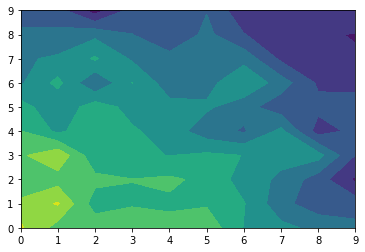

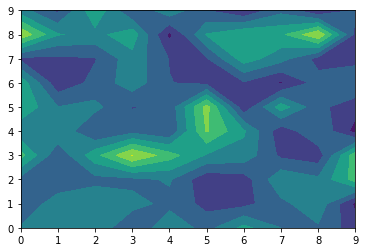

In [8]:
plt.contourf(pca_components_one)
plt.show()
plt.contourf(pca_components_two)
plt.show()
